In [0]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt



plt.style.use('seaborn')

In [8]:
#dataset

df=web.DataReader("TSLA", data_source="yahoo", start="2010-06-29", end="2020-02-03")

#prikaz podataka
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2020-01-28,576.809998,558.080017,568.489990,566.900024,11788500,566.900024
2020-01-29,589.799988,567.429993,575.690002,580.989990,17801500,580.989990
2020-01-30,650.880005,618.000000,632.419983,640.809998,29005700,640.809998


In [9]:
# Broj redaka i stupaca u datasetu
df.shape

(2416, 6)

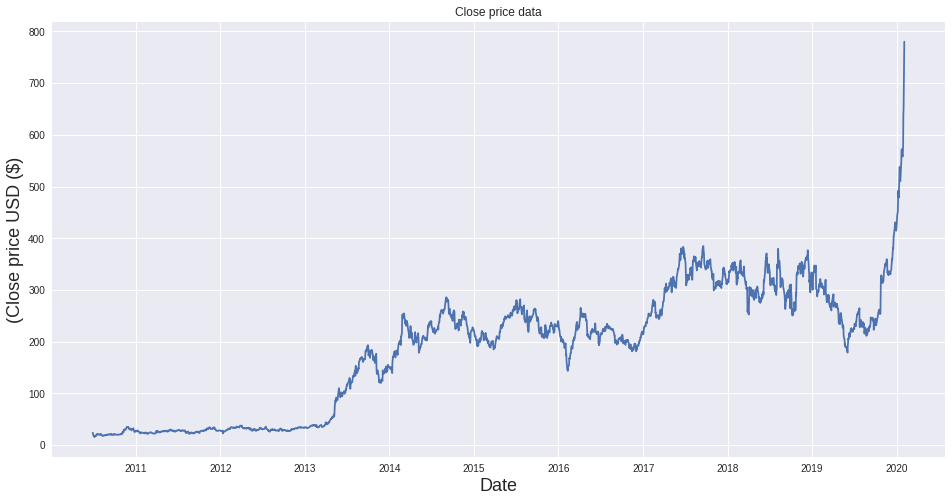

In [10]:
# Grafički prikaz dionica tesle iz dataseta za period 2010-2020
plt.figure(figsize=(16,8))
plt.title("Close price data")
plt.plot(df["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("(Close price USD ($)",fontsize=18)
plt.show()

In [11]:
#Prikaz "Close" podataka
data=df.filter(["Close"])
#convert u numpy array
dataset=data.values
#Broj redaka za treniranje
training_data_len=math.ceil(len(dataset)*.8) #mathceil rounds up equation

training_data_len

1933

In [12]:
#Skaliranje podataka
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01058623],
       [0.01050772],
       [0.00806072],
       ...,
       [0.81786181],
       [0.83063335],
       [1.        ]])

In [13]:
#Training dataset i skalirani training data set

train_data=scaled_data[0:training_data_len,:]
#Podjela podataka u x i y listu
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0]) # will contain 60 values
  y_train.append(train_data[i,0]) # will contain 61st value
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01058623, 0.01050772, 0.00806072, 0.0044491 , 0.00040565,
       0.        , 0.0021722 , 0.00209369, 0.0016357 , 0.00306202,
       0.00528657, 0.005352  , 0.00633342, 0.00799529, 0.00588851,
       0.00578383, 0.0068045 , 0.00718398, 0.00673907, 0.00621565,
       0.0064381 , 0.00595394, 0.00541743, 0.00669982, 0.00804763,
       0.00714473, 0.0060848 , 0.00495943, 0.00497252, 0.00422664,
       0.00274797, 0.0023554 , 0.00329757, 0.0038995 , 0.00438367,
       0.00388642, 0.00391259, 0.00431824, 0.00566605, 0.0044491 ,
       0.00536509, 0.0051688 , 0.00510338, 0.00532583, 0.00481549,
       0.0060848 , 0.00688301, 0.00686993, 0.00620257, 0.00667364,
       0.00642502, 0.0057184 , 0.0064381 , 0.00696153, 0.00808689,
       0.00672599, 0.00579691, 0.00688301, 0.00650353, 0.00532583])]
[0.00492017701667884]

[array([0.01058623, 0.01050772, 0.00806072, 0.0044491 , 0.00040565,
       0.        , 0.0021722 , 0.00209369, 0.0016357 , 0.00306202,
       0.00528657, 0.005352  , 0.00

In [0]:

#Convert x_train i y_train u numpy array tako da se mogu koristiti za treniranje u LSTM modelu
x_train, y_train = np.array(x_train),np.array(y_train)

In [15]:
#Reshape the data - LSTM Network zahtjeva 3 dimensional shape, not 2D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1873, 60, 1)

In [0]:
#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
 #compile 
 model.compile(optimizer="adam",loss="mean_squared_error")

In [18]:
 #Train the model
 model.fit(x_train,y_train,batch_size=1, epochs=1)

1873/1873 [==============================] - 41s 22ms/step - loss: 5.7501e-04


In [0]:
#Testing data set
#Create a new array containing scaled values from index 1543 to 2002 / podaci potrebni za treniranje
test_data = scaled_data[training_data_len - 60: , :]
#dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [0]:
#konvertiranje u numpy array za potrebe LSTM-a
x_test = np.array(x_test)

In [0]:
#Reshape data tako da bude 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Predviđena cijena
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [23]:
#Get the root mean squared error (RMSE) - standardna deviacija
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

20.796420548727042

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


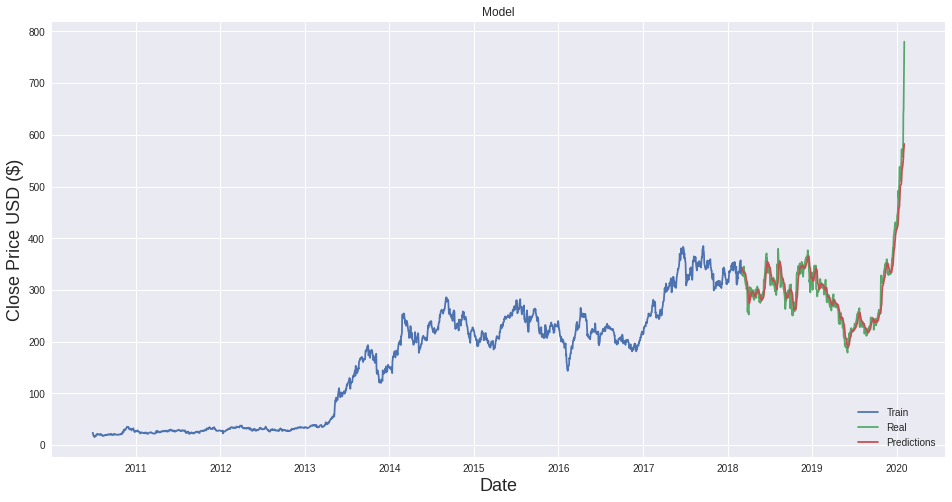

In [24]:
#Plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Real', 'Predictions'], loc='lower right')
plt.show()

In [25]:
#Stvarna i predviđena cijena
valid

,Close,Predictions
Date,,
2018-03-05,333.350006,342.980011
2018-03-06,328.200012,341.022797
2018-03-07,332.299988,338.511230
2018-03-08,329.100006,336.577332
2018-03-09,327.170013,334.736084
...,...,...
2020-01-28,566.900024,545.000732
2020-01-29,580.989990,549.442139
2020-01-30,640.809998,554.666443
